# Bollinger Bands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import BollingerBands

In [58]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations
Results: 
- hband > hband_i
- hband intercorrelation super high
- lband ~ 12
- mavg ~12

Choose:
- pband_100 = -0.19
- wband_10 and wband_200
- hband, lband_20

In [ ]:
def variations(windows:list[int], dev: list[float]):
    """
    returns variations of atr indicator with given windows
    """
    name = "bb_"
    for w in windows:
        for d in dev:
            end = str(w) + "_" + str(d)
            bb = BollingerBands(df["close"], window=w, window_dev=d)
            df[name + "hband_" + end] = bb.bollinger_hband()
            df[name + "hband_i_" + end] = bb.bollinger_hband_indicator()
            df[name + "lband_" + end] = bb.bollinger_lband()
            df[name + "lband_i_" + end] = bb.bollinger_lband_indicator()
            df[name + "mavg_" + end] = bb.bollinger_mavg()
            df[name + "pband_" + end] = bb.bollinger_pband()
            df[name + "wband_" + end] = bb.bollinger_wband() #width band, try width/close

In [60]:
variations([10, 20, 50, 100, 200], [2])

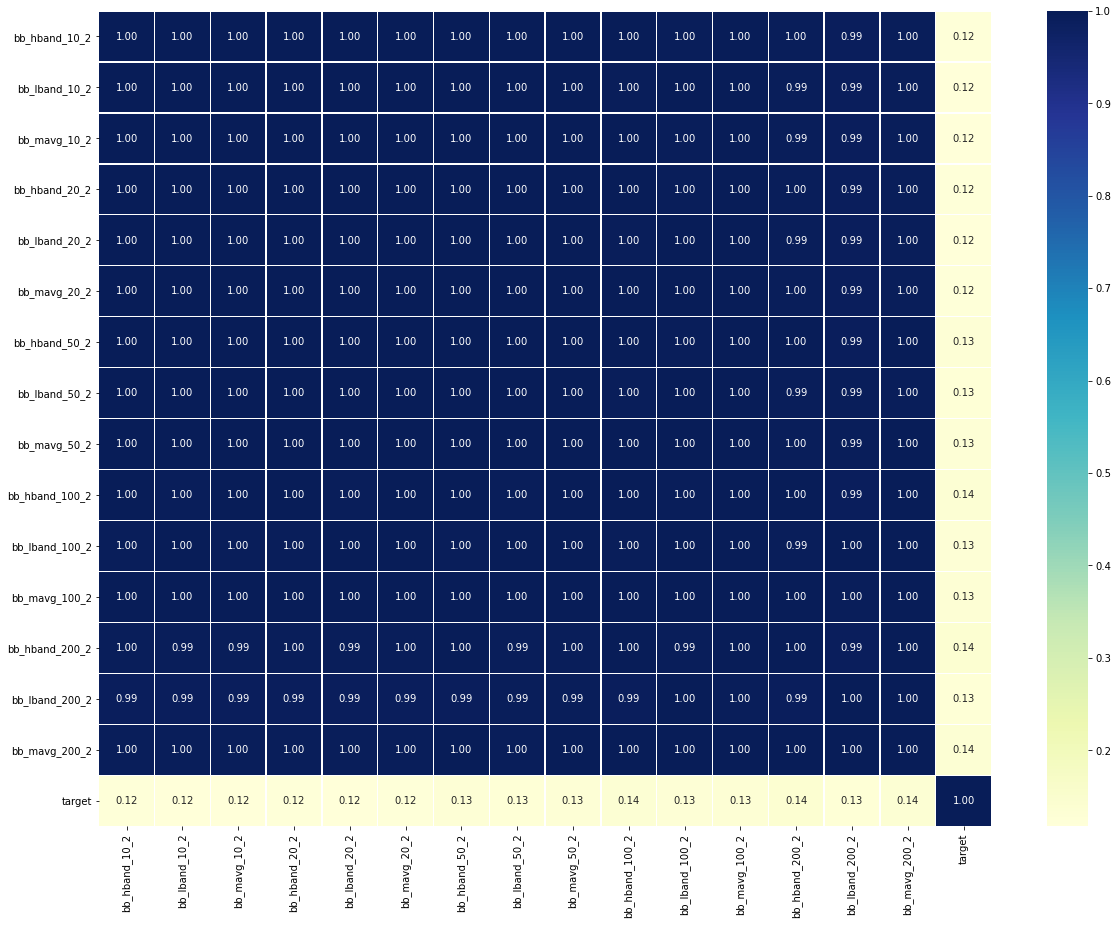

In [57]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Analysis on high and low band - close
close diff: hband-close over close has 0.19 correlation

In [103]:
dplot = df[["bb_hband_20_2", "bb_lband_20_2"]].copy()
dplot["close_diff"] = list(map(lambda l, c: l-c, df.bb_hband_20_2, df.close))
dplot["close_diff_o_close"] = list(map(lambda x, c: x/c, dplot.close_diff, df.close))
dplot["cdoc_rate"] = uf.get_rate(dplot.close_diff_o_close)
dplot["close_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x), dplot.close_diff_o_close))


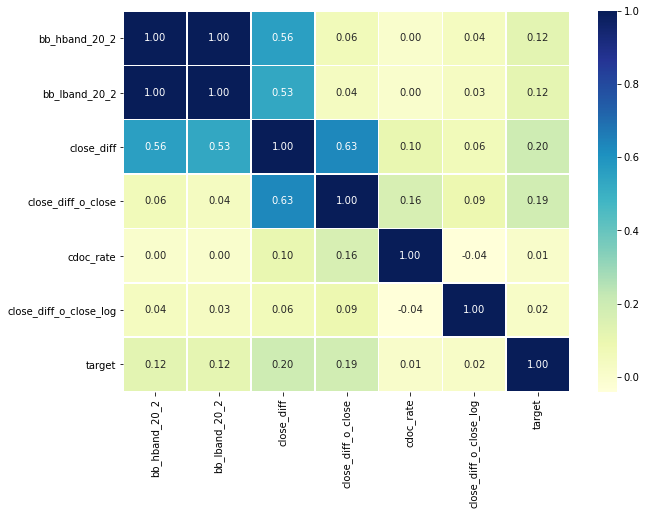

In [104]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

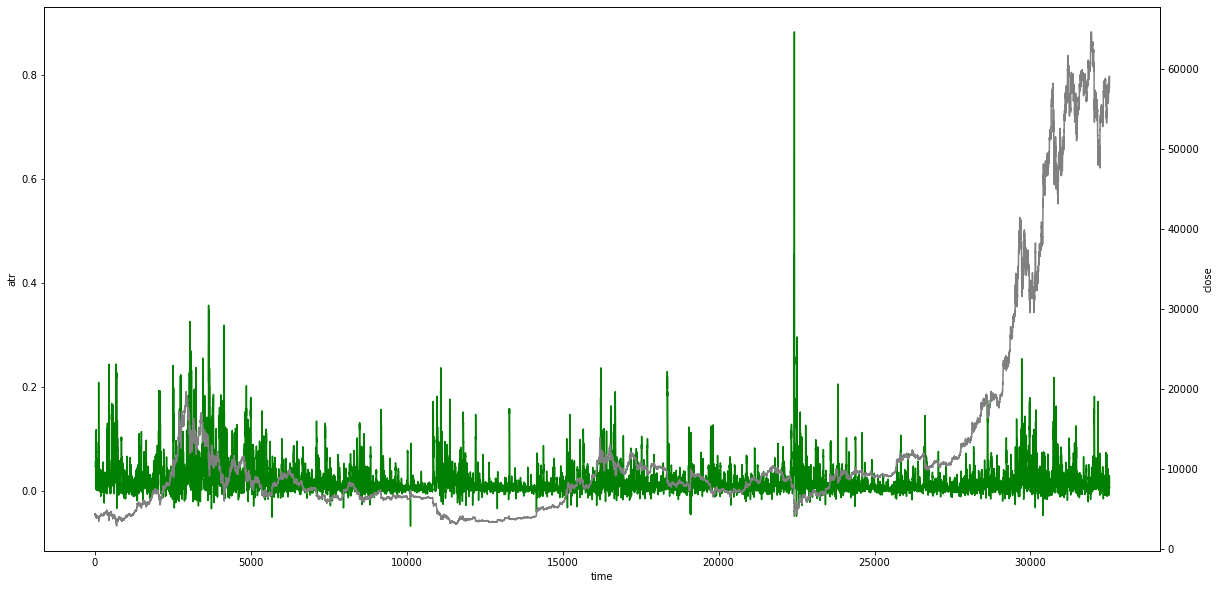

In [88]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dplot.close_diff_o_close,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Analysis on wband over close

Results: no over close necessary, already fits in range

In [101]:
dplot = df[["bb_wband_10_2", "bb_wband_200_2"]].copy()
dplot["wband_rate"] = uf.get_rate(dplot.bb_wband_10_2)
dplot["wband_10_o_close"] = list(map(lambda x, c: x/c, df.bb_wband_10_2, df.close))
dplot["wband_200_o_close"] = list(map(lambda x, c: x/c, df.bb_wband_200_2, df.close))

# dplot["close_diff"] = list(map(lambda l, c: l-c, df.bb_hband_20_2, df.close))
# dplot["close_diff_o_close"] = list(map(lambda x, c: x/c, dplot.close_diff, df.close))
# dplot["close_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x), dplot.close_diff_o_close))


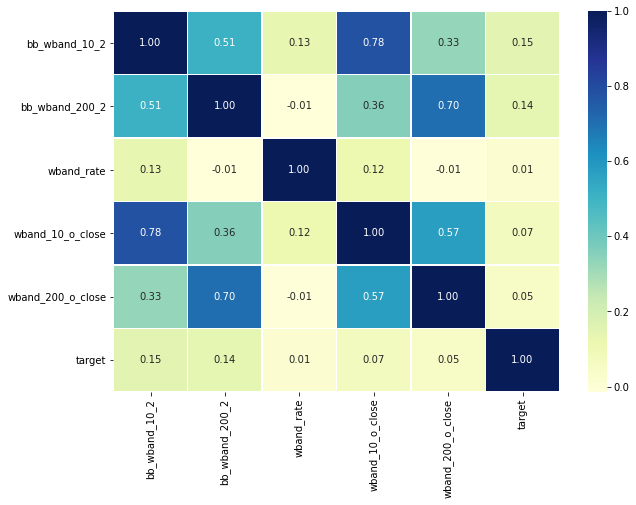

In [102]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

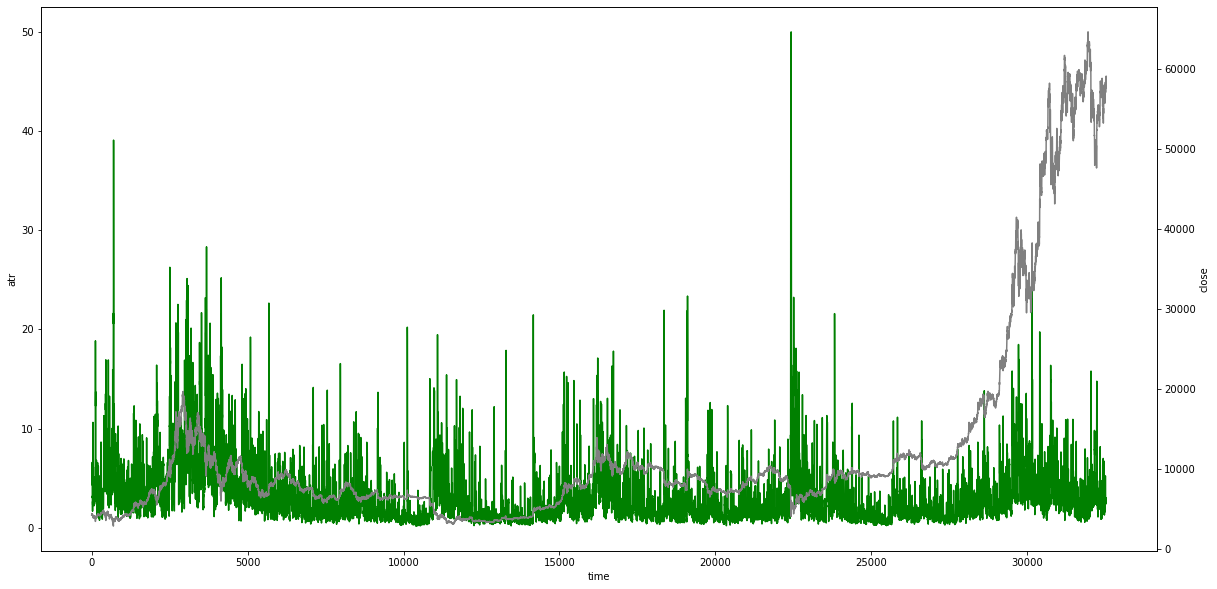

In [95]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dplot.bb_wband_10_2,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Analysis on pband

In [99]:
dplot = df[["bb_pband_100_2"]].copy()
dplot["pband_rate"] = uf.get_rate(dplot.bb_pband_100_2)

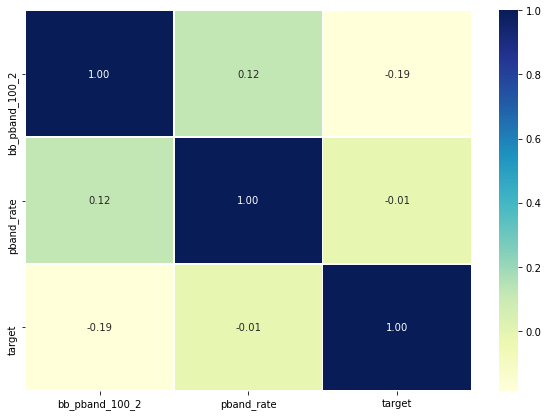

In [100]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

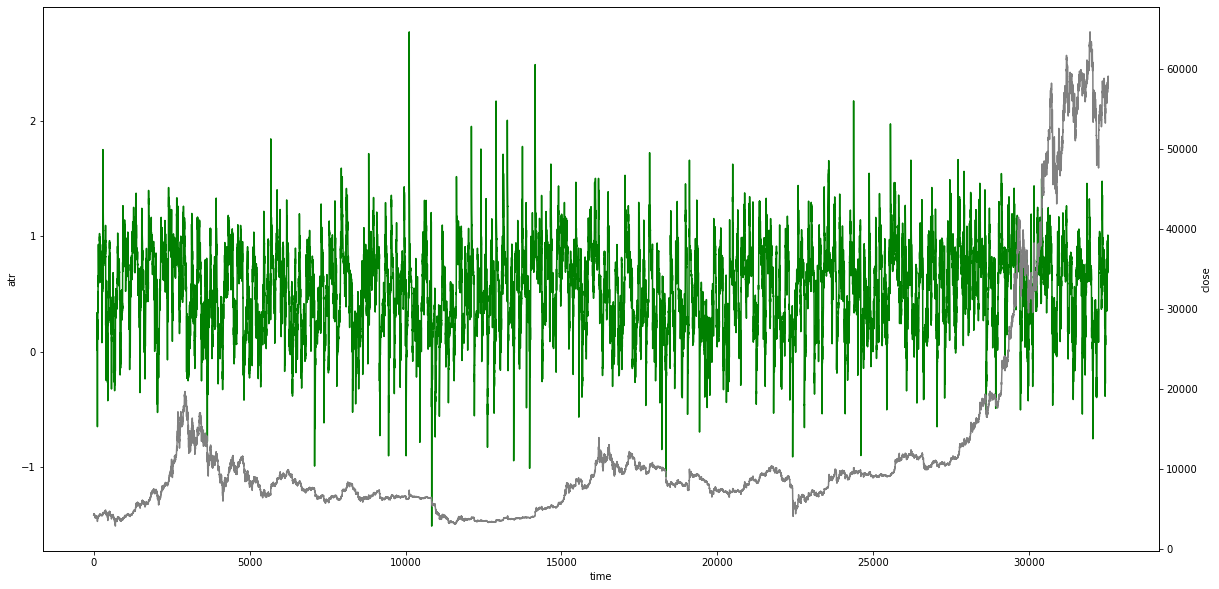

In [98]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dplot.bb_pband_100_2,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Conclusion

In [105]:
dplot = df[["bb_wband_10_2", "bb_wband_200_2", "bb_pband_100_2"]].copy()
dplot["close_diff_o_close"] = list(map(lambda l, c: (l-c)/c, df.bb_hband_20_2, df.close))

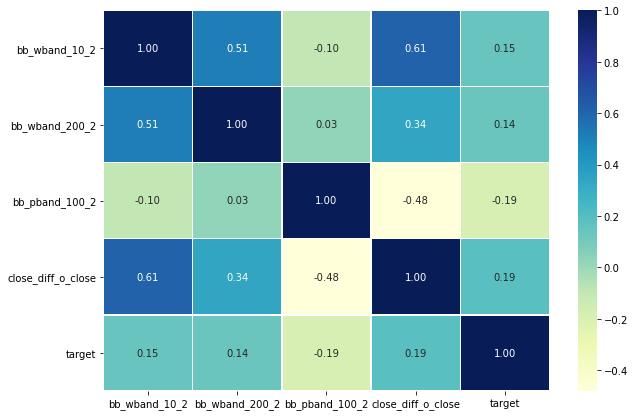

In [106]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Feature importance

In [109]:
d["close"] = df.close
d.dropna(inplace=True)
close = d["close"]

X = d.drop(["target", "close"], axis=1)
y = d["target"]

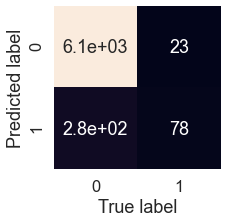

In [110]:
crg.plot_conf_matrix(X, y)

In [111]:
crg.generate_report(X, y)

{'precision': 0.11081506090808416,
 'recall': 0.03484848484848485,
 'f1': 0.053855785427107464}

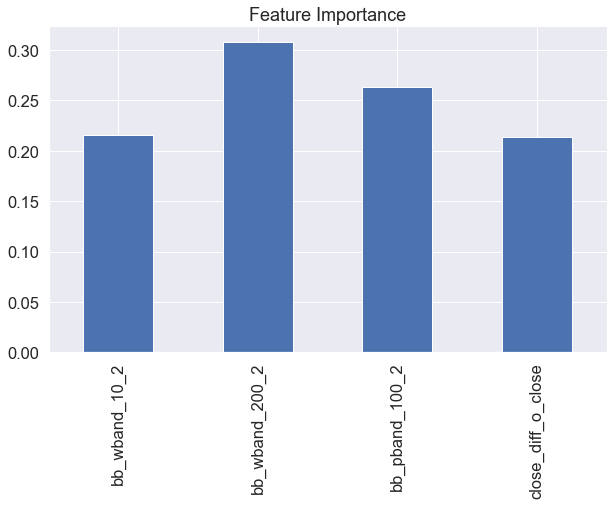

In [112]:
crg.feature_importance(X, y, plot=True)

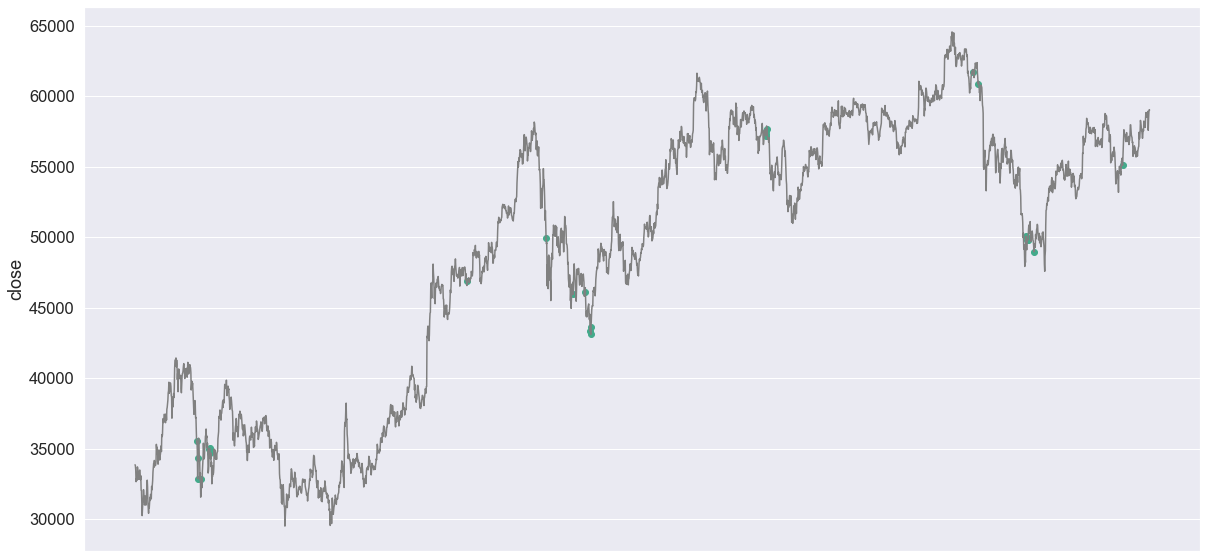

In [114]:
crg.forward_test(X, y, close, mistakes=False)

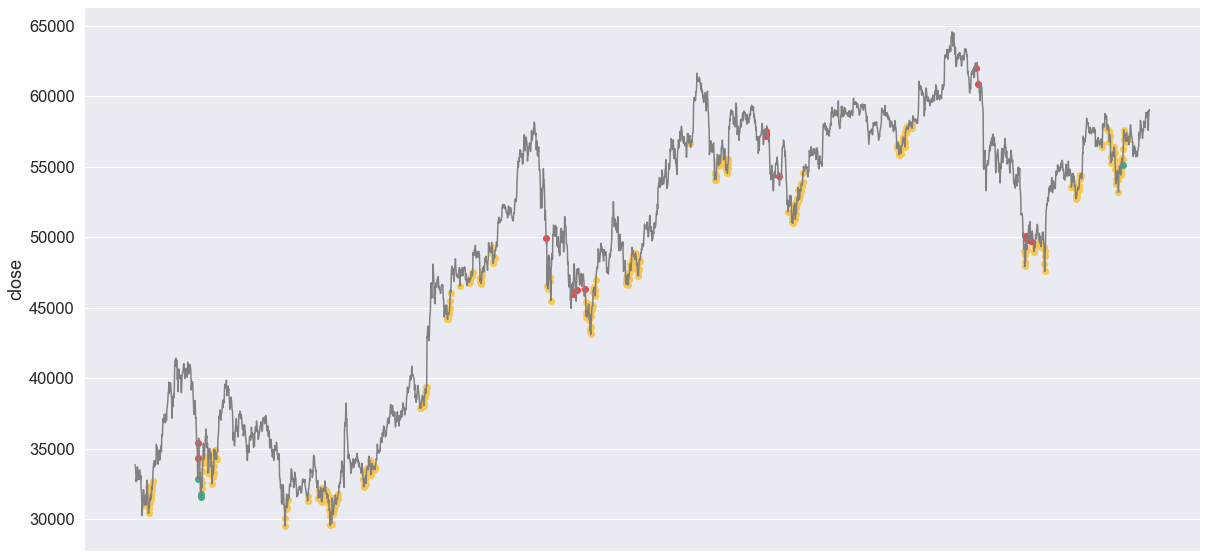

In [115]:
crg.forward_test(X, y, close, mistakes=True)